In [61]:
import pandas as pd
import numpy as np
import random

In [62]:
#dataset
dataset_path = 'D:/coding/StyleScript/ml/styles.csv'
data = pd.read_csv(dataset_path, on_bad_lines='skip')
print("Dataset Overview...")
print(data.head())


Dataset Overview...
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [63]:
columns_to_keep = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

data = data[columns_to_keep]
print(data.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

    usage  
0  Casual  
1  Casual  
2  Casual  
3  Casual  
4  Casual  


In [64]:
#clean
data.dropna( subset=['gender', 'masterCategory', 'baseColour'], inplace=True)
data['baseColour'] = data['baseColour'].fillna('Unknown')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


In [65]:
data.columns = [col.strip().lower() for col in data.columns]
print("\n Column values in gender:", data['gender'].unique())
print("Column values in season:", data['season'].unique())
print("Column values in usage:", data['usage'].unique())


 Column values in gender: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Column values in season: ['Fall' 'Summer' 'Winter' 'Spring' nan]
Column values in usage: ['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [66]:
mc = data['mastercategory'].unique()
sc = data['subcategory'].unique()
g = data['gender'].unique()
s = data['season'].unique()
u = data['usage'].unique()

print("mastercategory values: ", mc)
print("subcategory values: ", sc, sep="\n")
print("gender values: ",g,sep="\n")
print("season values: ", s,sep="\n")
print("usage values: ",u, sep="\n")

mastercategory values:  ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
subcategory values: 
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
gender values: 
['Men' 'Women' 'Boys' 'Girls' 'Unisex']
season values: 
['Fall' 'Summer' 'Winter' 'Spring' nan]
usage values: 
['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [67]:
data = data[data['gender'].isin(["Men", "Women"])]
data = data[data['mastercategory'].isin(['Apparel','Footwear'])]
data = data[~data['subcategory'].isin(['Innerwear','Loungewear and Nightwear'])]
data = data[~data['usage'].isin([None,'Home'])]
print(data['subcategory'].unique())

['Topwear' 'Bottomwear' 'Shoes' 'Flip Flops' 'Sandal' 'Saree' 'Dress'
 'Apparel Set']


In [68]:
data.head(5)


,id,gender,mastercategory,subcategory,articletype,basecolour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


Skin Tone Classification

In [69]:
! pip install stone



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
! wget "https://m.media-amazon.com/images/M/MV5BOTQzOWJiYjEtZmUxMC00YjA5LTgzNjUtYjMyZTVmZjVmMmZiXkEyXkFqcGc@._V1_FMjpg_UY720_.jpg" -O /content/dhanush.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [71]:
from PIL import Image
from PIL import ImageColor
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import stone


from IPython.display import HTML


In [72]:
# Skin tone mapping based on hex colors
skin_tones = {
    "#373028": "Deepest Skin",
    "#422811": "Very Deep",
    "#513B2E": "Deep Brown",
    "#6F503C": "Medium Brown",
    "#81654F": "Tan",
    "#9D7A54": "Light Tan",
    "#BEA07E": "Medium Fair",
    "#E5C8A6": "Light Fair",
    "#E7C1B8": "Warm Fair",
    "#F3DAD6": "Very Fair",
    "#FBF2F3": "Pale",
}


In [73]:
image_path = '/content/download.jpeg'

def detect_skin_tone(image):
  image = cv2.imread(image_path)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  resized_image = cv2.resize(image, (200, 200))




  average_color = resized_image.mean(axis=0).mean(axis=0)
  avg_color_hex = "#{:02x}{:02x}{:02x}".format(int(average_color[0]), int(average_color[1]), int(average_color[2]))
  avg_color_rgb = np.array(ImageColor.getrgb(avg_color_hex))

  closest_tone_hex = min(
        skin_tones.keys(),
        key=lambda hex_code: np.linalg.norm(avg_color_rgb - np.array(ImageColor.getrgb(hex_code)))
    )
  return closest_tone_hex, skin_tones[closest_tone_hex]

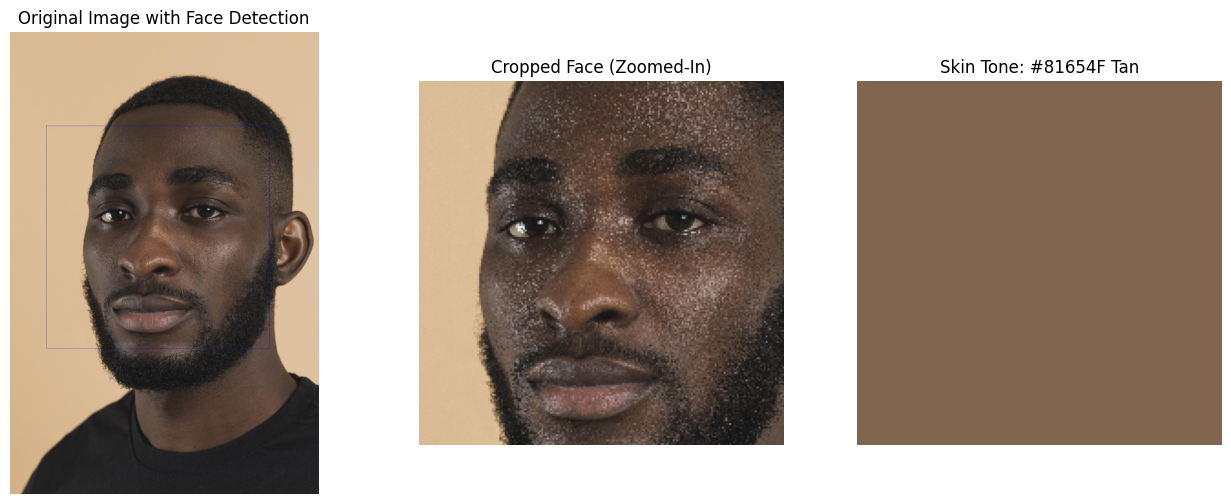

Detected faces: 1


In [74]:

# display_box([detected_tone_hex,detected_tone_name] )
detected_tone_hex = ""
class FaceCropper(object):


    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    def generate(self, image_path, show_result=True):
        img = cv2.imread(image_path)
        if img is None:
            print("Can't open image file")
            return 0

        # Convert to grayscale for better face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
        if len(faces) == 0:
            print('Failed to detect faces')
            return 0

        if show_result:
            # Draw bounding boxes around the faces on the original image
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Convert the image from BGR to RGB for correct display with matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Prepare for showing cropped face images
            cropped_faces = []

            # Crop faces and resize them to show as zoomed-in images
            for (x, y, w, h) in faces:
                face_img = img[y:y + h, x:x + w]
                resized_face = cv2.resize(face_img, (200, 200))  # Resize to zoom in
                cropped_faces.append((resized_face, (x, y, w, h)))  # Save cropped face and original position

            # Create a figure with 1 row and 3 columns for side-by-side display
            fig, ax = plt.subplots(1, 3, figsize=(16, 6))

            # Show the original image with bounding boxes in the first column
            ax[0].imshow(img_rgb)
            ax[0].axis('off')  # Hide axes
            ax[0].set_title('Original Image with Face Detection')

            # Show the first cropped face in the second column (zoomed-in)
            if cropped_faces:
                zoomed_face, (x, y, w, h) = cropped_faces[0]
                zoomed_face_rgb = cv2.cvtColor(zoomed_face, cv2.COLOR_BGR2RGB)
                global detected_tone_hex

                # Display the zoomed-in face in the second column
                ax[1].imshow(zoomed_face_rgb)
                ax[1].axis('off')  # Hide axes
                ax[1].set_title('Cropped Face (Zoomed-In)')

                # Optional: Draw the bounding box on the zoomed-in face
                rect_x = int((zoomed_face.shape[1] - w) / 2)  # Position the bounding box relative to zoom
                rect_y = int((zoomed_face.shape[0] - h) / 2)
                ax[1].add_patch(plt.Rectangle((rect_x, rect_y), w, h, linewidth=2, edgecolor='r', facecolor='none'))

                # Detect the skin tone of the cropped face
                skin_tone, skin_color = detect_skin_tone(img)
                detected_tone_hex = skin_tone
                orange_block = np.ones((10, 10, 3))
                orange_rgb = matplotlib.colors.hex2color(skin_tone)
                orange_block[:, :] = orange_rgb
                # Display the skin tone next to the zoomed-in face in the third column
                ax[2].imshow(orange_block)  # Display a block of color that represents the skin tone
                ax[2].axis('off')  # Hide axes
                ax[2].set_title(f"Skin Tone: {skin_tone} {skin_color}")

            plt.show()

        facecnt = len(faces)
        print(f"Detected faces: {facecnt}")

        # Save the cropped faces
        i = 0
        for (x, y, w, h) in faces:
            # Crop the face area
            faceimg = img[y:y + h, x:x + w]
            # Resize face to 32x32 (or any other size you prefer)
            lastimg = cv2.resize(faceimg, (32, 32))
            i += 1
            cv2.imwrite(f"image{i}.jpg", lastimg)



# Usage in Jupyter Notebook

# Provide the image path directly
# image_path = "D:coding/StyleScript/ml/download.jpeg.jpg"
image_path = "D:/coding/StyleScript/ml/close-up-upset-american-black-person.jpg"

# Create the FaceCropper instance and run the face detection
detector = FaceCropper()
detector.generate(image_path, show_result=True)

In [75]:
# Skin tone to color mapping
skin_tone_to_color_mapping = {
    "#373028": ["Navy Blue", "Black", "Charcoal", "Burgundy", "Maroon", "Olive", "Rust", "Gold", "Cream", "Peach"],
    "#422811": ["Navy Blue", "Brown", "Khaki", "Olive", "Maroon", "Mustard", "Teal", "Tan", "Rust", "Burgundy"],
    "#513B2E": ["Cream", "Beige", "Olive", "Burgundy", "Red", "Orange", "Mustard", "Bronze", "Teal", "Peach"],
    "#6F503C": ["Beige", "Brown", "Green", "Khaki", "Cream", "Peach", "Lime Green", "Olive", "Maroon", "Rust", "Mustard"],
    "#81654F": ["Beige", "Off White", "Sea Green", "Cream", "Lavender", "Mauve", "Burgundy", "Yellow", "Lime Green"],
    "#9D7A54": ["Olive", "Khaki", "Yellow", "Sea Green", "Turquoise Blue", "Coral", "White", "Gold", "Peach"],
    "#BEA07E": ["Coral", "Sea Green", "Turquoise Blue", "Pink", "Lavender", "Rose", "White", "Peach", "Teal", "Fluorescent Green"],
    "#E5C8A6": ["Turquoise Blue", "Peach", "Teal", "Pink", "Red", "Rose", "Off White", "White", "Cream", "Gold", "Yellow"],
    "#E7C1B8": ["Pink", "Rose", "Peach", "White", "Off White", "Beige", "Lavender", "Teal", "Fluorescent Green"],
    "#F3DAD6": ["White", "Cream", "Peach", "Pink", "Rose", "Lavender", "Mustard", "Lime Green", "Light Blue", "Fluorescent Green"],
    "#FBF2F3": ["Soft Pastels (Peach, Lavender, Pink)", "White", "Off White", "Rose", "Light Blue", "Sea Green", "Fluorescent Green", "Silver", "Cream", "Tan"]
}

# Get recommended colors for the detected skin tone
recommended_colors = skin_tone_to_color_mapping.get(detected_tone_hex,[])
print(f"Recommended Colors for {detected_tone_hex}: {recommended_colors}")


Recommended Colors for #81654F: ['Beige', 'Off White', 'Sea Green', 'Cream', 'Lavender', 'Mauve', 'Burgundy', 'Yellow', 'Lime Green']
